### In the absence of no-reference Image Quality Assessment (IQA) metrics tailored for medical phantom.
### we infer image details by computing Standard Deviation, Laplacian Variance, and Entropy.
### We aim for higher values in these metrics, indicative of increased image detail and quality,
### despite acknowledging that our images may exhibit lower overall quality.

In [3]:
import os
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.filters import laplace
from scipy.stats import entropy as scipy_entropy

def compute_nr_iqa(image):
    """
    Calculates no-reference image quality assessment (NR-IQA) features for a given image.

    Args:
        image (np.ndarray): The grayscale image for which to calculate NR-IQA features.

    Returns:
        dict: A dictionary containing the calculated NR-IQA features:
            - Standard Deviation: Standard deviation of pixel intensity values.
            - Laplacian Variance: Variance of the Laplacian filter applied to the image.
            - Entropy: Image entropy calculated using skimage.metrics.entropy.
    """

    std_dev = np.std(image)
    laplacian_img = laplace(image, ksize=3)  # Apply the Laplacian filter
    laplacian_var = np.var(laplacian_img)  # Compute the variance of the Laplacian
    # Calculate global entropy
    hist, _ = np.histogram(image, bins=256, range=(0, 256))
    prob_dist = hist / np.sum(hist)
    entropy_val = scipy_entropy(prob_dist, base=2)

    return {
        'Standard Deviation': std_dev,
        'Laplacian Variance': laplacian_var,
        'Entropy': entropy_val,
    }

def normalize_features(features):
    """
    Normalize the NR-IQA features to a common scale.

    Args:
        features (dict): A dictionary containing the NR-IQA features.

    Returns:
        dict: A dictionary containing the normalized NR-IQA features.
    """
    std_dev = features['Standard Deviation']
    laplacian_var = features['Laplacian Variance']
    entropy = features['Entropy']

    # Calculate the minimum and maximum values for each feature
    std_dev_min, std_dev_max = min(std_dev), max(std_dev)
    laplacian_var_min, laplacian_var_max = min(laplacian_var), max(laplacian_var)
    entropy_min, entropy_max = min(entropy), max(entropy)

    # Normalize the features to the range [0, 1]
    normalized_std_dev = (std_dev - std_dev_min) / (std_dev_max - std_dev_min)
    normalized_laplacian_var = (laplacian_var - laplacian_var_min) / (laplacian_var_max - laplacian_var_min)
    normalized_entropy = (entropy - entropy_min) / (entropy_max - entropy_min)

    return {
        'Standard Deviation': normalized_std_dev,
        'Laplacian Variance': normalized_laplacian_var,
        'Entropy': normalized_entropy,
    }



folders = ['/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomTV',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_noise2self',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_patch2self',
           '/Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantom_N2F']

# Initialize dictionaries to store the results
avg_results = {}

for folder in folders:
    results = []

    # Loop through each image in the folder
    for filename in os.listdir(folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.tif')):
            image_path = os.path.join(folder, filename)
            # Read the image
            image = imread(image_path)
            image = image/255

            # Check if the image is grayscale; if not, convert it
            if image.ndim == 3 and image.shape[2] == 3:
                image = rgb2gray(image)
            elif image.ndim == 3 and image.shape[2] == 1:
                image = np.squeeze(image)  # Remove the channel dimension



            nr_iqa_features = compute_nr_iqa(image)
            results.append(nr_iqa_features)
            



    # Compute the average values for each feature
    avg_std_dev = np.mean([result['Standard Deviation'] for result in results])
    avg_laplacian_var = np.mean([result['Laplacian Variance'] for result in results])
    avg_entropy = np.mean([result['Entropy'] for result in results])

    # Store the average values in the avg_results dictionary
    avg_results[folder] = {
        'Average Standard Deviation': avg_std_dev,
        'Average Laplacian Variance': avg_laplacian_var,
        'Average Entropy': avg_entropy
    }

# Display the results
for folder, result in avg_results.items():
    print(f"Results for {folder}:")
    for feature, value in result.items():
        print(f"{feature}: {value:.4f}")
    print()



Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomNLM:
Average Standard Deviation: 0.3874
Average Laplacian Variance: 0.3902
Average Entropy: 0.8120

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM3D:
Average Standard Deviation: 0.3873
Average Laplacian Variance: 0.3816
Average Entropy: 0.8116

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoising-Within-FFC-MRI/ProjectCode/Algorithms/TraditionalMethods/Experiments/DenoisedImages/MedicalPhantomTrad/MedicalPhantomBM4D:
Average Standard Deviation: 0.0011
Average Laplacian Variance: 0.0000
Average Entropy: 0.0000

Results for /Users/dolorious/Desktop/Dissertation/HonoursProject-CS4529-Blind-Denoi

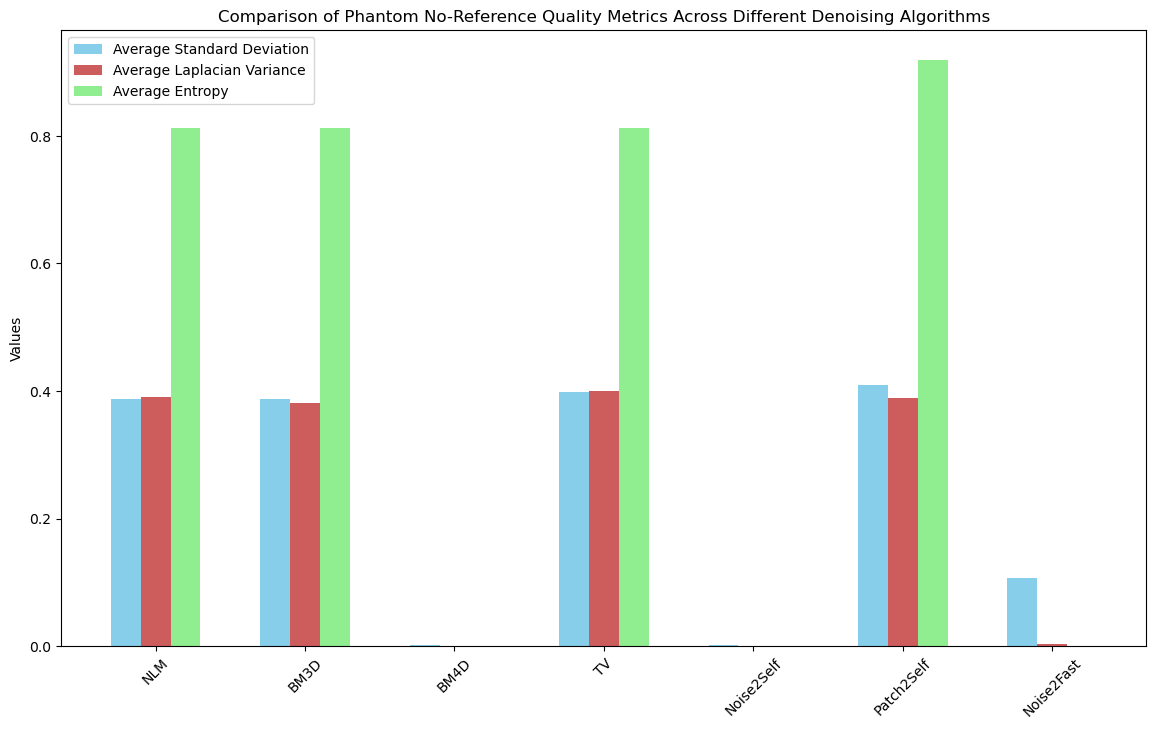

In [4]:
import matplotlib.pyplot as plt
import numpy as np


algorithms = ['NLM', 'BM3D', 'BM4D', 'TV', 'Noise2Self', 'Patch2Self', 'Noise2Fast']
avg_std_devs = [0.3874, 0.3873, 0.0011, 0.3992, 0.0011, 0.4096, 0.1074] 
avg_laplacian_vars = [0.3902, 0.3816, 0.0000, 0.4007, 0.0000, 0.3883, 0.0031] 
avg_entropies = [0.8120, 0.8116, 0.0000, 0.8123, 0.0000, 0.9197, 0.0000] 

x = np.arange(len(algorithms))  # the label locations
width = 0.2  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))

# Plotting each metric
ax.bar(x - width, avg_std_devs, width=width, label='Average Standard Deviation', color='SkyBlue')
ax.bar(x, avg_laplacian_vars, width=width, label='Average Laplacian Variance', color='IndianRed')
ax.bar(x + width, avg_entropies, width=width, label='Average Entropy', color='LightGreen')

ax.set_ylabel('Values')
ax.set_title('Comparison of Phantom No-Reference Quality Metrics Across Different Denoising Algorithms')

ax.set_xticks(x)
ax.set_xticklabels(algorithms)
ax.legend()


plt.xticks(rotation=45)

plt.show()

